### IMPORTING LIBRARIES

In [1]:
#import libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

### LOAD THE DATA

In [3]:
df = pd.read_csv("C:\\Users\\krina\\breastcancer.csv")
df.head(10)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010              0.14710   
1          0.08474           0.07864         0.08690              0.07017   
2          0.10960           0.15990         0.19740              0.12790   
3          0.14250           0.28390         0.24140              0.10520   
4          0.10030           0.13280         0.19800              0.10430   
5          0.12780           0.17000         0.15780              0.08089   
6          0.09463           0.10900         0.11270              0.07400   
7          0.11890           0.16450         0.09366              0.05985   
8          0.12730           0.19320         0.18590              0.09353   
9          0.11860           0.23960         0.22730              0.08543   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   
5  ...          23.75           103.40       741.6            0.1791   
6  ...          27.66           153.20      1606.0            0.1442   
7  ...          28.14           110.60       897.0            0.1654   
8  ...          30.73           106.20       739.3            0.1703   
9  ...          40.68            97.65       711.4            0.1853   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   
5             0.5249           0.5355                0.1741          0.3985   
6             0.2576           0.3784                0.1932          0.3063   
7             0.3682           0.2678                0.1556          0.3196   
8             0.5401           0.5390                0.2060          0.4378   
9             1.0580           1.1050                0.2210          0.4366   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  
5                  0.12440          NaN  
6                  0.08368          NaN  
7                  0.11510          NaN  
8                  0.10720          NaN  
9                  0.20750          NaN  

[10 rows x 33 columns]

In [4]:
#Count the number of rows and columns in the data set
df.shape

(569, 33)

### DATA CLEANING AND EXPLORATION

In [6]:
#Count the empty (NaN, NAN, na) values in each column
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
#Drop the column with all missing values (na, NAN, NaN)
#NOTE: This drops the column Unnamed
df = df.dropna(axis=1)

In [8]:
#Get the new count of the number of rows and cols
df.shape

(569, 32)

In [9]:
#Get a count of the number of 'M' & 'B' cells
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

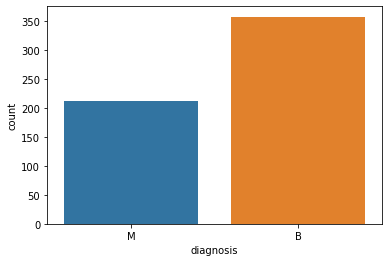

In [11]:
#Visualize this count 
sns.countplot(df['diagnosis'],label="Count")

In [12]:
#Look at the data types 
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

### ENCODING CATEGORICAL DATA 

In [14]:
#Encoding categorical data values 
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1]= labelencoder_Y.fit_transform(df.iloc[:,1].values)
#print(labelencoder_Y.fit_transform(df.iloc[:,1].values))

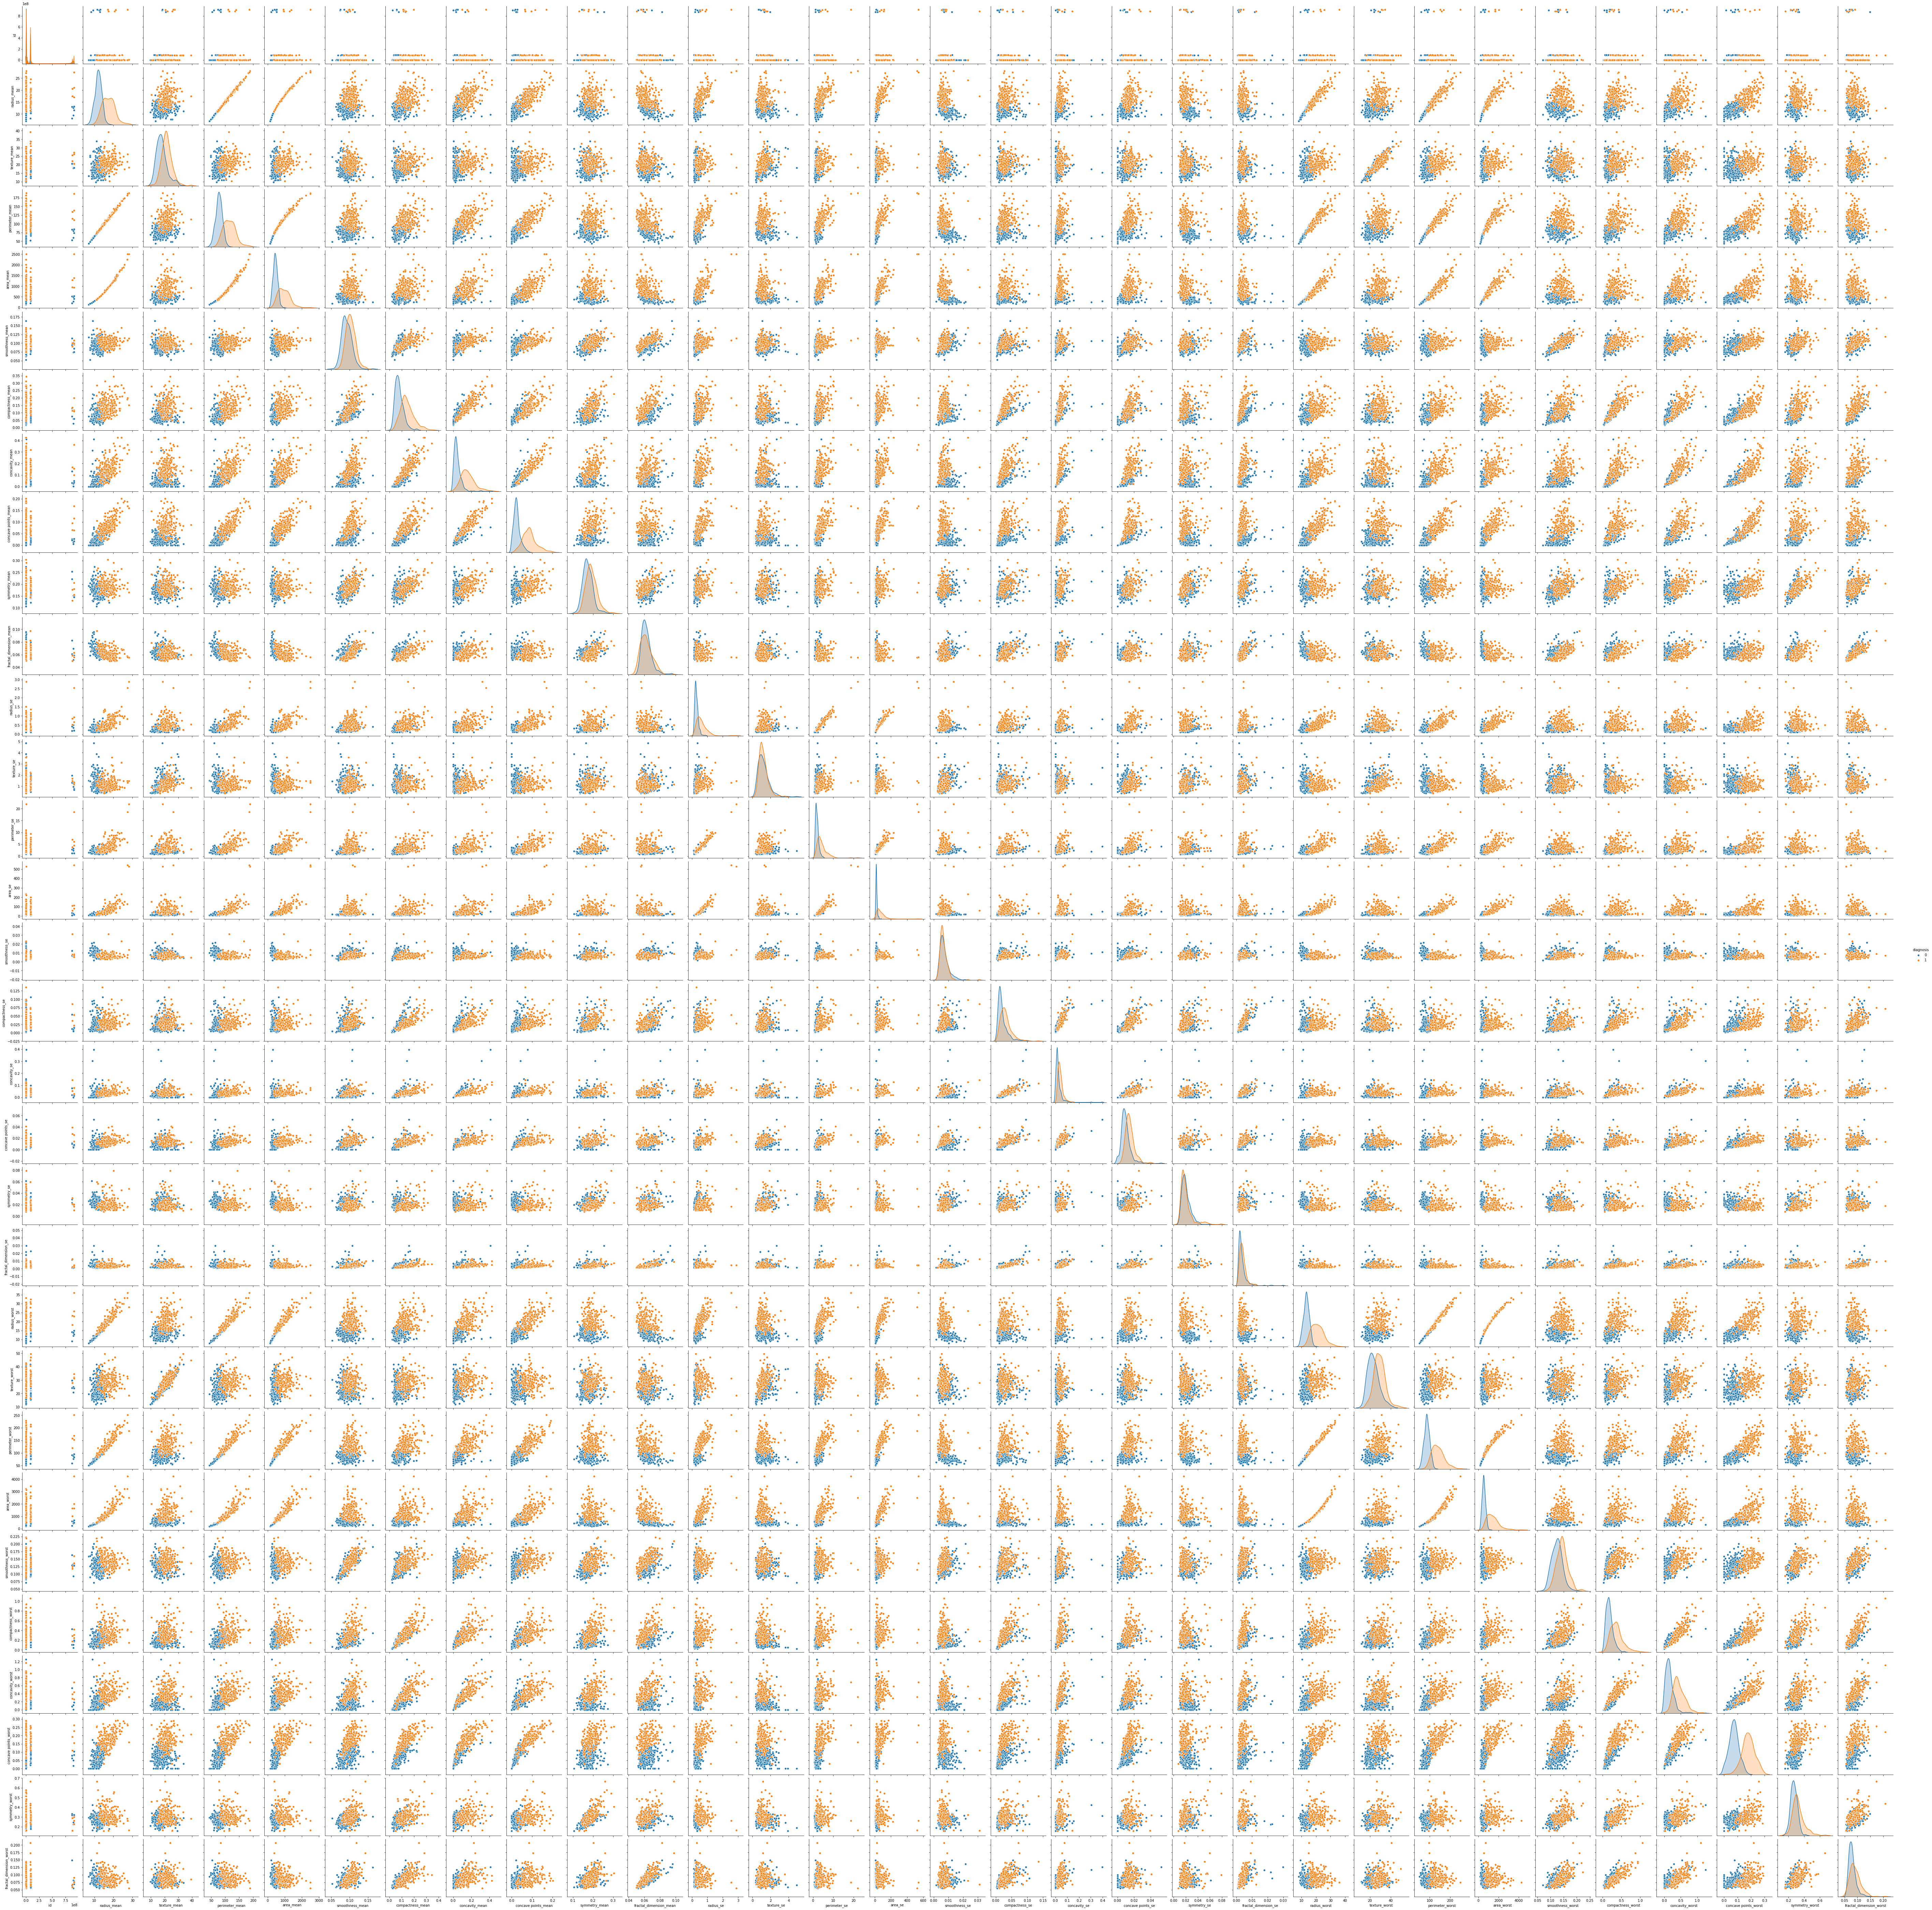

In [15]:
sns.pairplot(df, hue="diagnosis")

In [16]:
#PRINTING THE NEW DATASET
df.head(5)

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [17]:
#Get the correlation of the columns
df.corr()

id  diagnosis  radius_mean  texture_mean  \
id                       1.000000   0.039769     0.074626      0.099770   
diagnosis                0.039769   1.000000     0.730029      0.415185   
radius_mean              0.074626   0.730029     1.000000      0.323782   
texture_mean             0.099770   0.415185     0.323782      1.000000   
perimeter_mean           0.073159   0.742636     0.997855      0.329533   
area_mean                0.096893   0.708984     0.987357      0.321086   
smoothness_mean         -0.012968   0.358560     0.170581     -0.023389   
compactness_mean         0.000096   0.596534     0.506124      0.236702   
concavity_mean           0.050080   0.696360     0.676764      0.302418   
concave points_mean      0.044158   0.776614     0.822529      0.293464   
symmetry_mean           -0.022114   0.330499     0.147741      0.071401   
fractal_dimension_mean  -0.052511  -0.012838    -0.311631     -0.076437   
radius_se                0.143048   0.567134     0.679090      0.275869   
texture_se              -0.007526  -0.008303    -0.097317      0.386358   
perimeter_se             0.137331   0.556141     0.674172      0.281673   
area_se                  0.177742   0.548236     0.735864      0.259845   
smoothness_se            0.096781  -0.067016    -0.222600      0.006614   
compactness_se           0.033961   0.292999     0.206000      0.191975   
concavity_se             0.055239   0.253730     0.194204      0.143293   
concave points_se        0.078768   0.408042     0.376169      0.163851   
symmetry_se             -0.017306  -0.006522    -0.104321      0.009127   
fractal_dimension_se     0.025725   0.077972    -0.042641      0.054458   
radius_worst             0.082405   0.776454     0.969539      0.352573   
texture_worst            0.064720   0.456903     0.297008      0.912045   
perimeter_worst          0.079986   0.782914     0.965137      0.358040   
area_worst               0.107187   0.733825     0.941082      0.343546   
smoothness_worst         0.010338   0.421465     0.119616      0.077503   
compactness_worst       -0.002968   0.590998     0.413463      0.277830   
concavity_worst          0.023203   0.659610     0.526911      0.301025   
concave points_worst     0.035174   0.793566     0.744214      0.295316   
symmetry_worst          -0.044224   0.416294     0.163953      0.105008   
fractal_dimension_worst -0.029866   0.323872     0.007066      0.119205   

                         perimeter_mean  area_mean  smoothness_mean  \
id                             0.073159   0.096893        -0.012968   
diagnosis                      0.742636   0.708984         0.358560   
radius_mean                    0.997855   0.987357         0.170581   
texture_mean                   0.329533   0.321086        -0.023389   
perimeter_mean                 1.000000   0.986507         0.207278   
area_mean                      0.986507   1.000000         0.177028   
smoothness_mean                0.207278   0.177028         1.000000   
compactness_mean               0.556936   0.498502         0.659123   
concavity_mean                 0.716136   0.685983         0.521984   
concave points_mean            0.850977   0.823269         0.553695   
symmetry_mean                  0.183027   0.151293         0.557775   
fractal_dimension_mean        -0.261477  -0.283110         0.584792   
radius_se                      0.691765   0.732562         0.301467   
texture_se                    -0.086761  -0.066280         0.068406   
perimeter_se                   0.693135   0.726628         0.296092   
area_se                        0.744983   0.800086         0.246552   
smoothness_se                 -0.202694  -0.166777         0.332375   
compactness_se                 0.250744   0.212583         0.318943   
concavity_se                   0.228082   0.207660         0.248396   
concave points_se              0.407217   0.372320         0.380676   
symmetry_se                   -0.081629  -0.072497         0.200

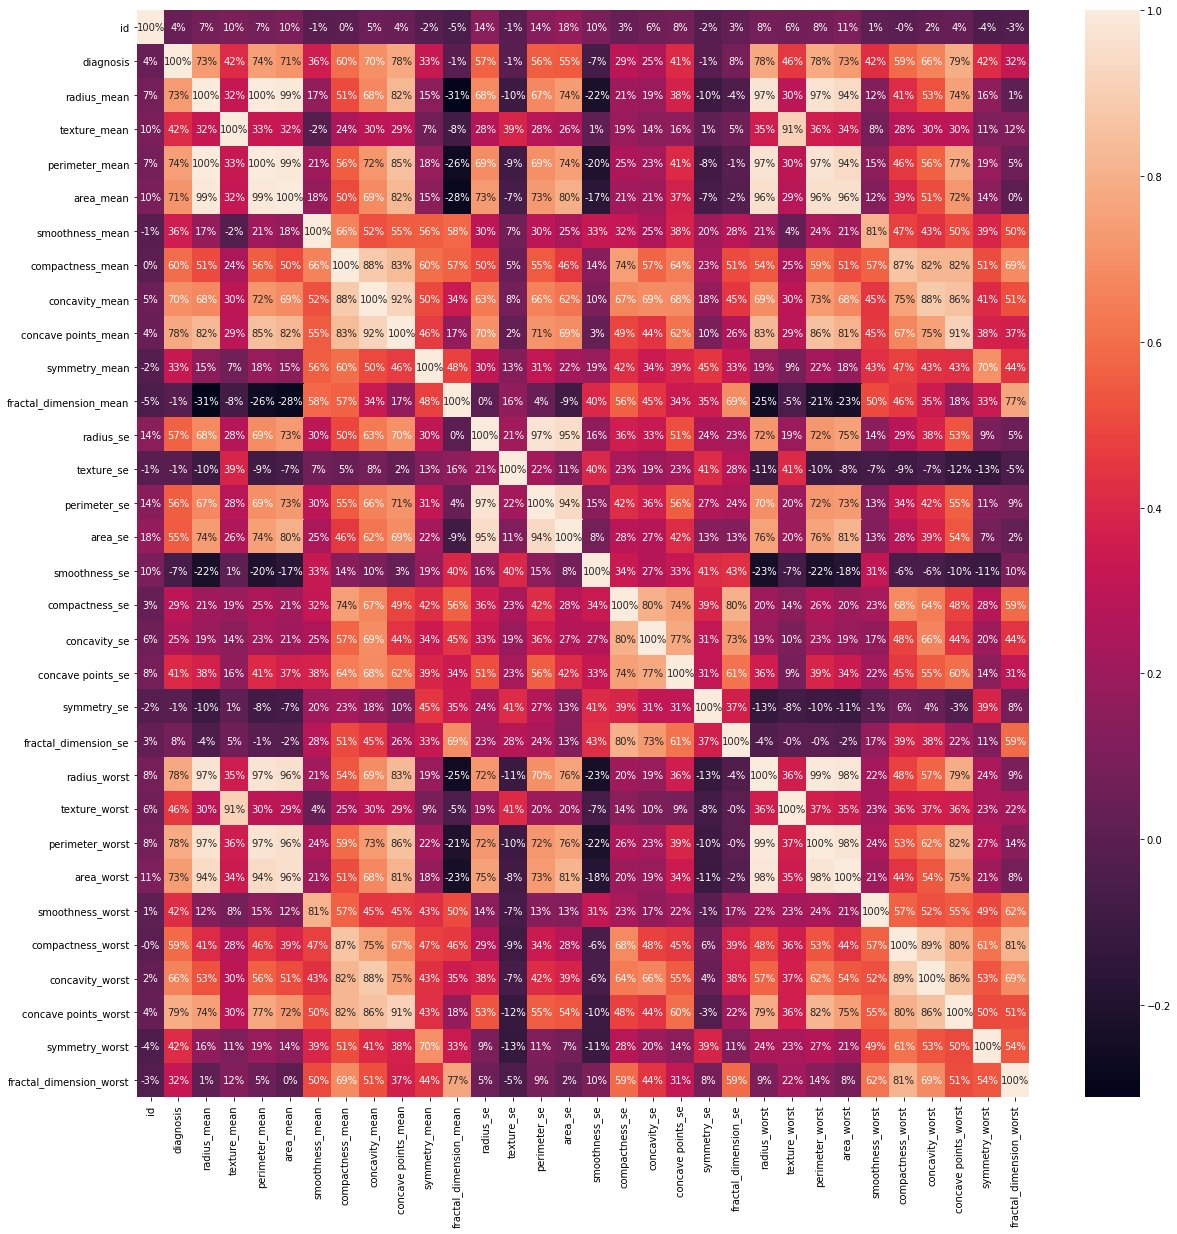

In [18]:
#Visualize the correlation by creating a heat map.
plt.figure(figsize=(20,20))  
sns.heatmap(df.corr(), annot=True, fmt='.0%')

### SPLITTING THE DATA

In [20]:
X = df.iloc[:, 2:31].values 
y= df.iloc[:, 1].values 

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### SCALING THE DATA

In [23]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
# Creating a function to plot ROC curve and finding AUC.
def plot_roc_auc(model):
    y_pred_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=[6.4, 4.8])
    ##Adding the ROC
    plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
    ##Title and label
    plt.legend(loc = 'lower right')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    return roc_auc

# Creating a function for Confusion Matrix
def conf_matrix_plot(model):
    plt.figure(figsize=(6,4))
    ConfMatrix = confusion_matrix(y_test,model.predict(X_test))
    akws = {"ha": 'left',"va": 'top'}
    sns.heatmap(ConfMatrix,annot=True,annot_kws=akws, cmap="Blues", fmt="d", xticklabels = ['Non-default', 'Default'], yticklabels = ['Non-default', 'Default'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title("Confusion Matrix")

### BUILDING MODELS

#### LOGISTIC REGRESSION

[[86  4]
 [ 4 49]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        90
           1       0.92      0.92      0.92        53

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143




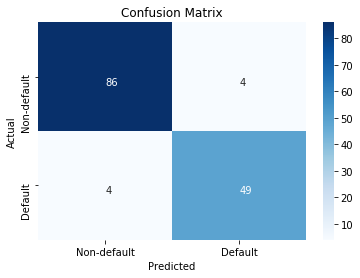

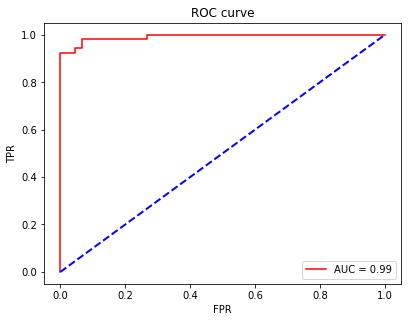

In [46]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)

# Predicting the Test set results
y_pred_lr = log_reg.predict(X_test)
y_pred_lrt = log_reg.predict(X_train)

cm=confusion_matrix(y_test,y_pred_lr)
print(cm)
conf_matrix_plot(log_reg)
print(classification_report(y_test, y_pred_lr, labels=[0,1]))
print()

# Plotting ROC 
auc_lr = plot_roc_auc(log_reg)

In [29]:
# check sensitivity and specificity
print('Accuracy   :\t',round(log_reg.score(X_test,y_test),2))
sensitivity_lr, specificity_lr, _ = sensitivity_specificity_support(y_test, y_pred_lr, average='binary')
print("Sensitivity: \t", round(sensitivity_lr, 2))
print("Specificity: \t", round(specificity_lr, 2))
print('AUC        :\t',round(auc_lr,2))

Accuracy   :	 0.94
Sensitivity: 	 0.92
Specificity: 	 0.96
AUC        :	 0.99


#### KNN

[[89  1]
 [ 5 48]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        90
           1       0.98      0.91      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143




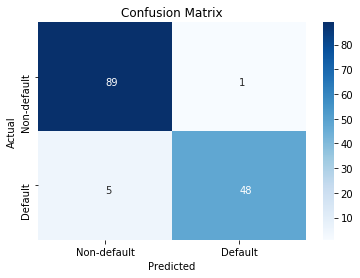

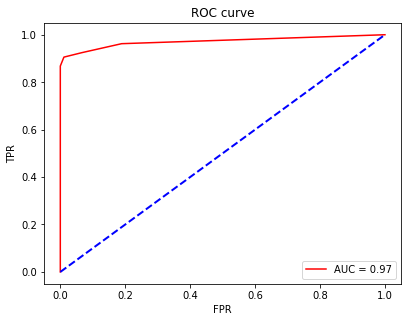

In [45]:
#Using KNeighborsClassifier 
from sklearn.neighbors import KNeighborsClassifier
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

# Predicting the Test set results
y_pred_lr = knn.predict(X_test)
y_pred_lrt = knn.predict(X_train)


cm=confusion_matrix(y_test,y_pred_lr)
print(cm)
conf_matrix_plot(knn)
print(classification_report(y_test, y_pred_lr, labels=[0,1]))
print()

# Plotting ROC 
auc_lr = plot_roc_auc(knn)

In [31]:
# check sensitivity and specificity
print('Accuracy   :\t',round(knn.score(X_test,y_test),2))
sensitivity_lr, specificity_lr, _ = sensitivity_specificity_support(y_test, y_pred_lr, average='binary')
print("Sensitivity: \t", round(sensitivity_lr, 2))
print("Specificity: \t", round(specificity_lr, 2))
print('AUC        :\t',round(auc_lr,2))

Accuracy   :	 0.96
Sensitivity: 	 0.91
Specificity: 	 0.99
AUC        :	 0.97


#### SVC LINEAR

[[87  3]
 [ 2 51]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        90
           1       0.94      0.96      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143




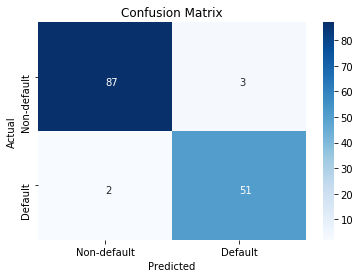

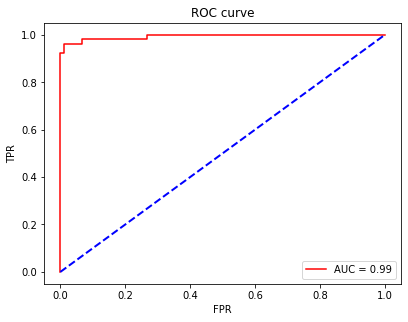

In [44]:
#Using SVC linear
from sklearn.svm import SVC
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
svc_lin = SVC(kernel = 'linear', random_state = 0,probability=True)
svc_lin.fit(X_train, y_train)

# Predicting the Test set results
y_pred_lr = svc_lin.predict(X_test)
y_pred_lrt = svc_lin.predict(X_train)


cm=confusion_matrix(y_test,y_pred_lr)
print(cm)
conf_matrix_plot(svc_lin)
print(classification_report(y_test, y_pred_lr, labels=[0,1]))
print()

# Plotting ROC 
auc_lr = plot_roc_auc(svc_lin)

In [33]:
# check sensitivity and specificity
print('Accuracy   :\t',round(svc_lin.score(X_test,y_test),2))
sensitivity_lr, specificity_lr, _ = sensitivity_specificity_support(y_test, y_pred_lr, average='binary')
print("Sensitivity: \t", round(sensitivity_lr, 2))
print("Specificity: \t", round(specificity_lr, 2))
print('AUC        :\t',round(auc_lr,2))

Accuracy   :	 0.97
Sensitivity: 	 0.96
Specificity: 	 0.97
AUC        :	 0.99


#### DECISION TREE

[[84  6]
 [ 1 52]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        90
           1       0.90      0.98      0.94        53

    accuracy                           0.95       143
   macro avg       0.94      0.96      0.95       143
weighted avg       0.95      0.95      0.95       143




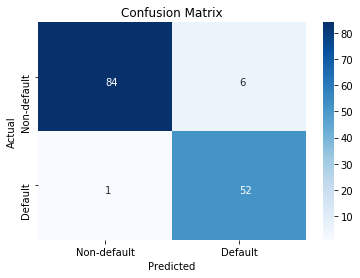

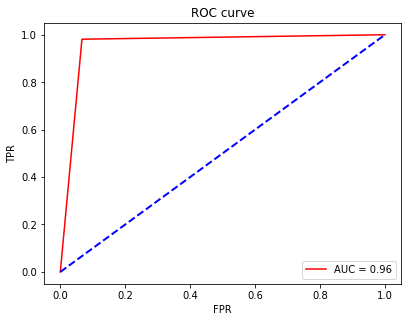

In [43]:
#Using decision tree
from sklearn.tree import DecisionTreeClassifier
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train, y_train)

# Predicting the Test set results
y_pred_lr = tree.predict(X_test)
y_pred_lrt = tree.predict(X_train)


cm=confusion_matrix(y_test,y_pred_lr)
print(cm)
conf_matrix_plot(tree)
print(classification_report(y_test, y_pred_lr, labels=[0,1]))
print()

# Plotting ROC 
auc_lr = plot_roc_auc(tree)

In [35]:
# check sensitivity and specificity
print('Accuracy   :\t',round(tree.score(X_test,y_test),2))
sensitivity_lr, specificity_lr, _ = sensitivity_specificity_support(y_test, y_pred_lr, average='binary')
print("Sensitivity: \t", round(sensitivity_lr, 2))
print("Specificity: \t", round(specificity_lr, 2))
print('AUC        :\t',round(auc_lr,2))

Accuracy   :	 0.95
Sensitivity: 	 0.98
Specificity: 	 0.93
AUC        :	 0.96


#### RANDOM FOREST

[[87  3]
 [ 2 51]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        90
           1       0.94      0.96      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143




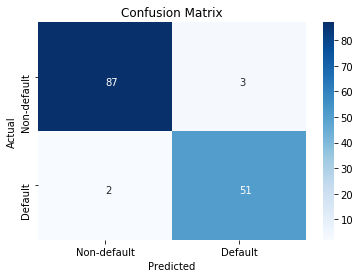

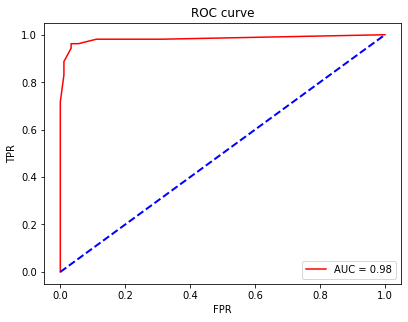

In [42]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred_rf = rf_model.predict(X_test)
#Confusion Matrix

#cm=confusion_matrix(y_test,y_pred_rf)
#print(cm)
conf_matrix_plot(rf_model)
print(classification_report(y_test, y_pred_rf, labels=[0,1]))
print()

# Plotting ROC 
auc_rf = plot_roc_auc(rf_model)

In [37]:
# check sensitivity and specificity
print('Accuracy   : \t',round(rf_model.score(X_test, y_test),2))
sensitivity_rf, specificity_rf, _ = sensitivity_specificity_support(y_test, y_pred_rf, average='binary')
print("Sensitivity: \t", round(sensitivity_rf, 2))
print("Specificity: \t", round(specificity_rf, 2))
print('AUC        : \t',round(auc_rf,2))

Accuracy   : 	 0.97
Sensitivity: 	 0.96
Specificity: 	 0.97
AUC        : 	 0.98


#### XGB

Confusion Matrix : 
[[89  1]
 [ 1 52]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        90
           1       0.98      0.98      0.98        53

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143




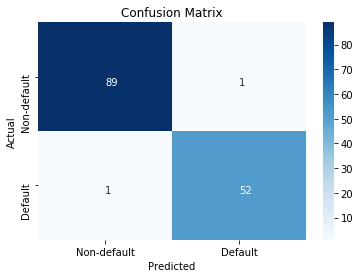

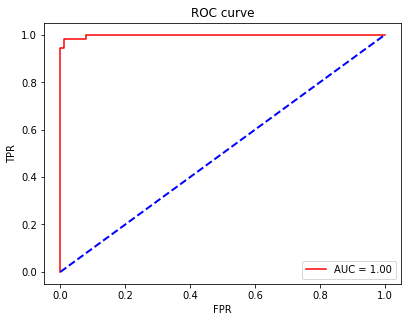

In [41]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=4, n_estimators=100, max_features=10)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Making the Confusion Matrix
print('Confusion Matrix : ')
#Confusion Matrix

#cm=confusion_matrix(y_test,y_pred_xgb)
#print(cm)
conf_matrix_plot(xgb)
print(classification_report(y_test, y_pred_xgb, labels=[0,1]))
print()

# Plotting ROC curve. 
auc_xgb = plot_roc_auc(xgb)

In [40]:
# check sensitivity and specificity
print('Accuracy   : \t',round(xgb.score(X_test, y_test),2))
sensitivity_xgb, specificity_xgb, _ = sensitivity_specificity_support(y_test, y_pred_xgb, average='binary')
print("Sensitivity: \t", round(sensitivity_xgb, 2))
print("Specificity: \t", round(specificity_xgb, 2))
print('AUC        : \t',round(auc_xgb,2))

Accuracy   : 	 0.99
Sensitivity: 	 0.98
Specificity: 	 0.99
AUC        : 	 1.0


As we can see that the results of XGBoost Classifier model on the validation set is consistent with the above results. Hence, it is the best performing model.